In [111]:
#importando as Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score, confusion_matrix, auc




In [164]:
plt.rcParams.update({'font.size':20})
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(20,20)})


In [78]:
#Importando o Arquivo

df = pd.read_excel('BD_CONSOLIDADO.xlsx')

#PORCENTAGEM  de tipo os bem sucedida por Bairro

state_office = df.groupby(['TECNICO','ANO_MES']).agg({'QTD_RET': 'sum'})
state_pcts = state_office.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

state_pcts


In [79]:
#Procura Valores Nulos na Tabela

def num_missing(x):
  return sum(x.isnull())

print ("Procurar values por coluna:")
print (df.apply(num_missing, axis=0))

Procurar values por coluna:
EMPRESA                 0
DATA_REFERENCIA         0
CODIGO_BAIXA            0
DESC_BAIXA              0
COD_CONTRATO            0
TIPO_OS_NUM             0
TIPO_OS                 0
TIPO_VISITA             0
AREA_NUM                0
AREA                    0
BAIRRO                  0
DATA AGENDADA           0
ANO_MES                 0
ANO                     0
MES                     0
PERIODO_NUM             0
PERIODO                 0
DIA_SEMANA              0
TECNICO_NUM        159277
TECNICO                 0
QTD_VISITA              0
SUCESSO                 0
VISITA_SUCESSO          0
QTD_RET                 0
dtype: int64


In [102]:
#Remover Coluna 
df.drop('TECNICO_NUM', axis=1)

,EMPRESA,DATA_REFERENCIA,CODIGO_BAIXA,DESC_BAIXA,COD_CONTRATO,TIPO_OS_NUM,TIPO_OS,TIPO_VISITA,AREA_NUM,AREA,...,PERIODO,DIA_SEMANA,TECNICO,QTD_VISITA,SUCESSO,VISITA_SUCESSO,QTD_RET,MOTIVO_BAIXA,CLASSIFICACAO_BAIXA,INSUCESSO
0,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,167102447,2,Diminuição de Pontos do Contrato,Primeira Visita,2,SSA_B,...,Manhã,quarta-feira,T3,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
1,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,95992078,2,Diminuição de Pontos do Contrato,Primeira Visita,2,SSA_B,...,Tarde,quarta-feira,T4,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
2,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,165341967,2,Diminuição de Pontos do Contrato,Primeira Visita,1,SSA_A,...,Tarde,quarta-feira,T1,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
3,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,95805251,0,Desconexão a Pedido do Cliente,Primeira Visita,3,SSA_C,...,Manhã,quarta-feira,T10,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
4,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,94987623,0,Desconexão a Pedido do Cliente,Primeira Visita,1,SSA_A,...,Tarde,quarta-feira,T5,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159272,Alcazar Coletas,2019-12-12,B2,B2 - Sem Acesso Ao equipamento,167303973,3,Retirada de Equipamento,Retorno de Visita,3,SSA_C,...,Tarde,quinta-feira,T,1,0,Sem Sucesso,0,Outras,Baixa Improdutiva,1
159273,Alcazar Coletas,2020-02-28,B2,B2 - Sem Acesso Ao equipamento,167647826,3,Retirada de Equipamento,Retorno de Visita,2,SSA_B,...,Manhã,sexta-feira,T3,1,0,Sem Sucesso,0,Outras,Baixa Improdutiva,1
159274,Alcazar Coletas,2020-04-15,B2,B2 - Sem Acesso Ao equipamento,167192101,0,Desconexão a Pedido do Cliente,Primeira Visita,2,SSA_B,...,Tarde,quarta-feira,T3,1,0,Sem Sucesso,0,Outras,Baixa Improdutiva,1
159275,Alcazar Coletas,2020-05-15,B2,B2 - Sem Acesso Ao equipamento,95651211,3,Retirada de Equipamento,Retorno de Visita,3,SSA_C,...,Manhã,sexta-feira,T8,1,0,Sem Sucesso,0,Outras,Baixa Improdutiva,1


In [80]:
#Organização da Base

### Criar uma variável motivo_da_Baixa
### Usando comandos 

def cria_motivo(CODIGO):
    if  str(CODIGO) in ['A6']:
        return 'Cliente Ausente'
    elif str(CODIGO) in ['1E6']:
        return 'Não Reside No Local'
    elif str(CODIGO) in ['B1']:
        return 'Cliente Solicitou Novo Agendamento'
    elif str(CODIGO) in ['A1']:
        return 'Não Localizou o endereço'
    elif str(CODIGO) in ['A0' ]:
        return 'Não compriu agenda'
    elif str(CODIGO) in ['284' ]:
        return 'Cliente não quer devolver o Equipamento'
    elif str(CODIGO) in ['2A8' ]:
        return 'Desco. Efetuada Com Retirada De Equipamento'    
    elif str(CODIGO) in ['2A9' ]:
        return 'Desco. Efetuada Sem Retirada de Equipamento'    
    elif str(CODIGO) in ['2B0' ]:
        return 'Equipamento Retirado'    
    elif str(CODIGO) in ['280']:
        return 'Solicitação de Vistoria'
    elif str(CODIGO) in ['1F2' ]:
        return 'Cliente naõ pediu o Serviço'       
    elif str(CODIGO) in ['1E1']:
        return 'OS Incorreta'
    else: return 'Outras'

In [81]:
#Organização da Base

### Criar uma variável motivo_da_Baixa
### Usando comandos 

def cria_INSUCESSO(CODIGO):
    if  CODIGO in [0]:
        return 1
    else: return 0

In [82]:
#Organização da Base

### Criar uma variável motivo_da_Baixa
### Usando comandos 

def classifica_motivo(CODIGO):
    if  str(CODIGO) in ['2A8']:
        return 'Baixa produtiva'
    elif str(CODIGO) in ['2A9']:
        return 'Baixa produtiva'
    elif str(CODIGO) in ['2B0']:
        return 'Baixa produtiva'
    else: return 'Baixa Improdutiva'


In [83]:
#Cria Coluna Motivo da Baixa
df['MOTIVO_BAIXA']=df['CODIGO_BAIXA'].apply(cria_motivo)

#Cria Classificação da Baixa, produtica ou improdutiva
df['CLASSIFICACAO_BAIXA']=df['CODIGO_BAIXA'].apply(classifica_motivo)

#cria CAmpo classificatorio para a ORdem de Serviço, se recuperou equipamento ou não
df['INSUCESSO']=df['SUCESSO'].apply(cria_INSUCESSO)

# Imprime Data Frame após alterações
df.head()

,EMPRESA,DATA_REFERENCIA,CODIGO_BAIXA,DESC_BAIXA,COD_CONTRATO,TIPO_OS_NUM,TIPO_OS,TIPO_VISITA,AREA_NUM,AREA,...,DIA_SEMANA,TECNICO_NUM,TECNICO,QTD_VISITA,SUCESSO,VISITA_SUCESSO,QTD_RET,MOTIVO_BAIXA,CLASSIFICACAO_BAIXA,INSUCESSO
0,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,167102447,2,Diminuição de Pontos do Contrato,Primeira Visita,2,SSA_B,...,quarta-feira,NaN,T3,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
1,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,95992078,2,Diminuição de Pontos do Contrato,Primeira Visita,2,SSA_B,...,quarta-feira,NaN,T4,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
2,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,165341967,2,Diminuição de Pontos do Contrato,Primeira Visita,1,SSA_A,...,quarta-feira,NaN,T1,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
3,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,95805251,0,Desconexão a Pedido do Cliente,Primeira Visita,3,SSA_C,...,quarta-feira,NaN,T10,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
4,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,94987623,0,Desconexão a Pedido do Cliente,Primeira Visita,1,SSA_A,...,quarta-feira,NaN,T5,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1


In [10]:
#Crio função que cria Gráficos

def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual})
    if plot:
        sns.countplot(x)
        plt.kind='barh'
        plt.figsize= (20, 20)
        plt.legend=True
        plt.tabela=True
        plt.show()
    return res

In [11]:
#Agrupo por Empresa e sumarizo quantidade total de visita.
df.groupby(['EMPRESA']).agg({'QTD_VISITA': np.sum}).head()


,QTD_VISITA
EMPRESA,
Alcazar Coletas,159277


In [12]:
#Agrupo por Empresa e sumarizo quantidade de visitas com sucesso ou Insucesso.

df.groupby(['EMPRESA','VISITA_SUCESSO']).agg({'QTD_VISITA': np.sum}).head()


QTD_VISITA
EMPRESA         VISITA_SUCESSO                 
Alcazar Coletas Sem Sucesso               94828
                Sucesso na Retirada       64449

In [13]:
print("Total de Equipamentos Retirados por Empresa")
df.groupby(['EMPRESA']).agg({'QTD_RET': np.sum}).head()

Total de Equipamentos Retirados por Empresa


,QTD_RET
EMPRESA,
Alcazar Coletas,113069


In [14]:
#Agrupo o data Frame por Empresa e tipo de OS, sumarizado pela quantidade de equipamento retirado

print("Total de Equipamentos Retirados por Tipo de OS")
df.groupby(['EMPRESA','TIPO_OS']).agg({'QTD_RET': np.sum}).head()


Total de Equipamentos Retirados por Tipo de OS


QTD_RET
EMPRESA         TIPO_OS                                  
Alcazar Coletas Desconexão a Pedido do Cliente      49979
                Desconexão por Inadimplência        19514
                Diminuição de Pontos do Contrato    11188
                Retirada de Equipamento             32388

In [15]:
#agrupo por Empresa e Tipo de OS, e tiro uma média de Equipamentos Retirados por OS

print("Média de Equipamentos Retirados por Tipo de OS")
df.groupby(['EMPRESA','TIPO_OS']).agg({'QTD_RET': np.mean}).head()


Média de Equipamentos Retirados por Tipo de OS


QTD_RET
EMPRESA         TIPO_OS                                   
Alcazar Coletas Desconexão a Pedido do Cliente    1.023573
                Desconexão por Inadimplência      0.430877
                Diminuição de Pontos do Contrato  0.695425
                Retirada de Equipamento           0.660010

In [16]:
#Agrupo por Empresa e Tipo de OS e Calculo o Desvio Padrão, ordenado pela Quantidade de Equipamento retirado

print("Desvio Padrão de Equipamentos Retirados por Tipo de OS")
df.groupby(['EMPRESA','TIPO_OS']).agg({'QTD_RET': np.std}).sort_values(by='QTD_RET', ascending=False).head()


Desvio Padrão de Equipamentos Retirados por Tipo de OS


QTD_RET
EMPRESA         TIPO_OS                                   
Alcazar Coletas Desconexão a Pedido do Cliente    1.323391
                Retirada de Equipamento           1.027585
                Desconexão por Inadimplência      0.928102
                Diminuição de Pontos do Contrato  0.803253

In [17]:
#agrupo  por Empresa, Tipo de OS e Area, para verificar somatoria de Equipamento retirado.

print("Valor Máximo retirado por Tipo de OS")
df.groupby(['EMPRESA','TIPO_OS','AREA']).agg({'QTD_RET': np.sum}).sort_values(by='QTD_RET', ascending=False).head(30)

Valor Máximo retirado por Tipo de OS


QTD_RET
EMPRESA         TIPO_OS                        AREA          
Alcazar Coletas Desconexão a Pedido do Cliente SSA_B    18718
                                               SSA_C    14323
                                               SSA_A    11093
                Retirada de Equipamento        SSA_B    10102
                                               SSA_C     9953

In [19]:
animelist = df[['TIPO_OS', 'QTD_RET']]
animelist.sort_values(by='QTD_RET', ascending=False)

,TIPO_OS,QTD_RET
129448,Desconexão a Pedido do Cliente,114
106416,Retirada de Equipamento,11
29473,Diminuição de Pontos do Contrato,11
111574,Desconexão a Pedido do Cliente,10
103350,Retirada de Equipamento,10
...,...,...
64459,Desconexão por Inadimplência,0
64458,Desconexão por Inadimplência,0
64457,Desconexão a Pedido do Cliente,0
64456,Desconexão a Pedido do Cliente,0


<AxesSubplot:title={'center':'Figura 1: Tipo de OS X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada'}, xlabel='TIPO_OS'>

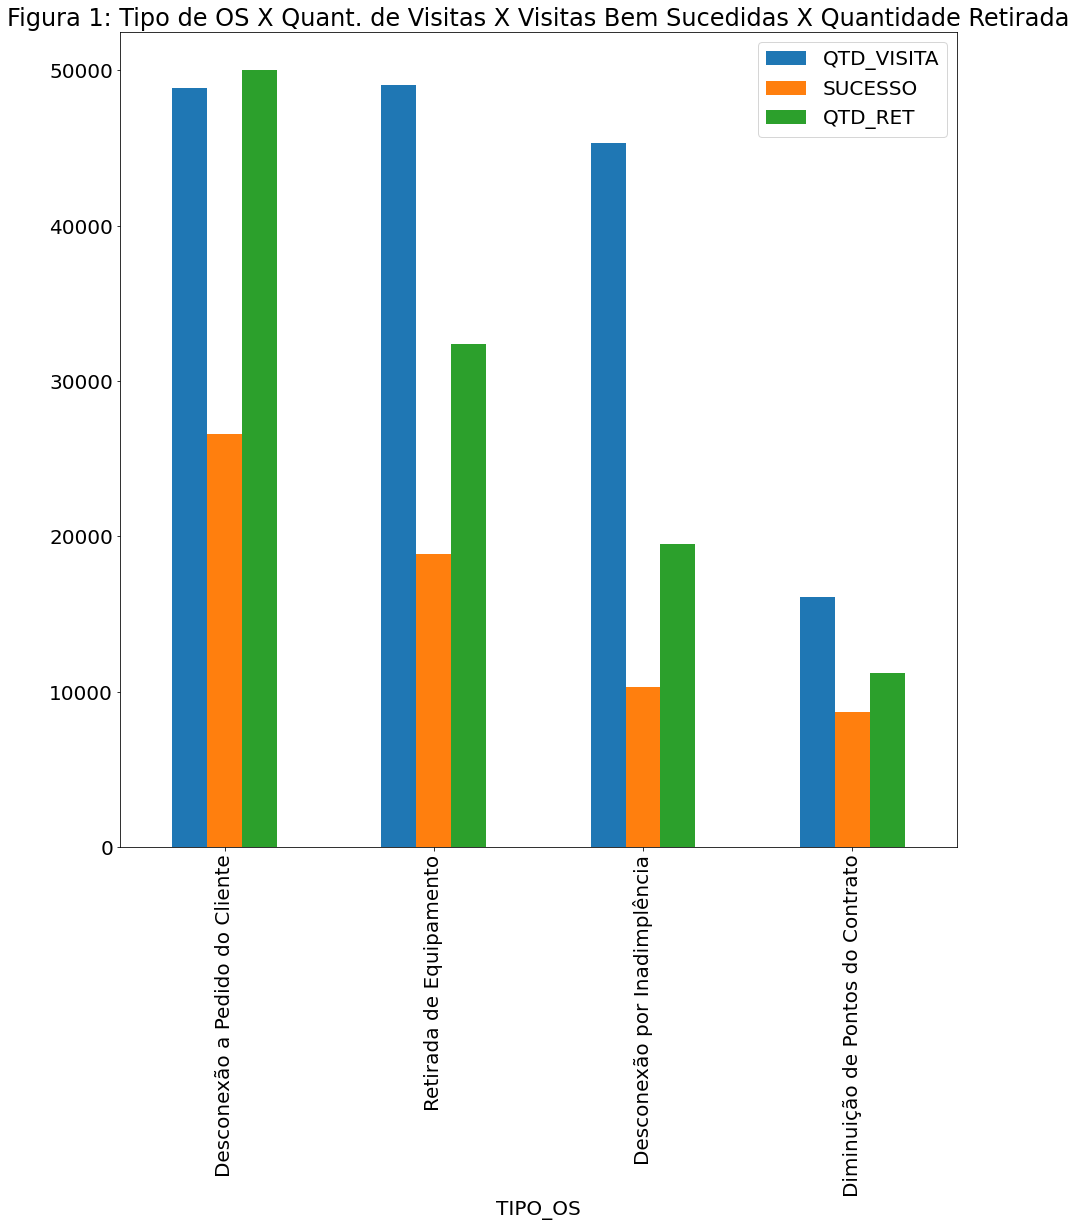

In [20]:
# gerar gráfico de Tipo de OS X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada'

df.groupby(['TIPO_OS']).agg({'QTD_VISITA': np.sum, 'SUCESSO': np.sum, 'QTD_RET': np.sum}) \
                        .sort_values(by='QTD_RET', ascending=False)[-10:].plot(kind='bar', \
                         title='Figura 1: Tipo de OS X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada' \
                         ,legend=True,figsize=(15, 15),)

<AxesSubplot:title={'center':'Figura 2: Área X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada'}, xlabel='AREA'>

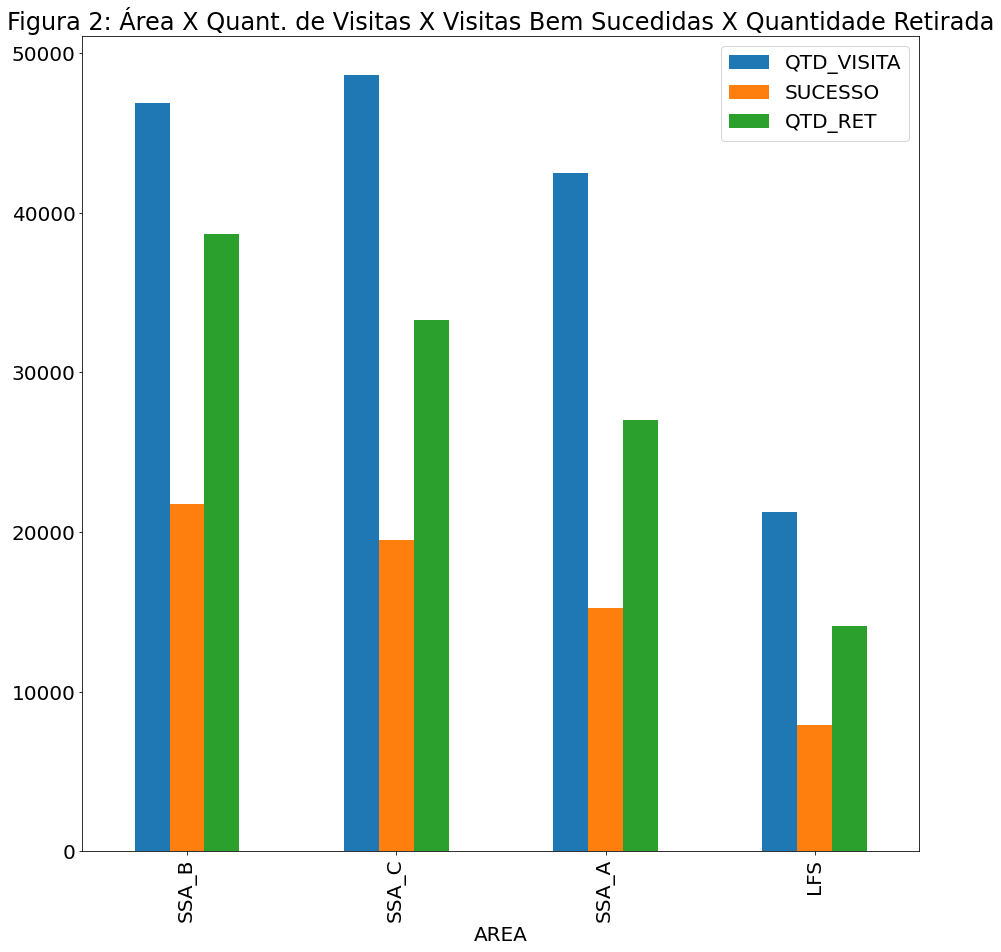

In [21]:
# gerar gráfico de Área X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada

df.groupby(['AREA']).agg({'QTD_VISITA': np.sum, 'SUCESSO': np.sum, 'QTD_RET': np.sum})\
                    .sort_values(by='QTD_RET', ascending=False)[-10:] \
                    .plot(kind='bar',legend=True,figsize=(15, 15) \
                    ,title='Figura 2: Área X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada') 

<AxesSubplot:title={'center':'Figura 3: Periodo X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada'}, xlabel='PERIODO'>

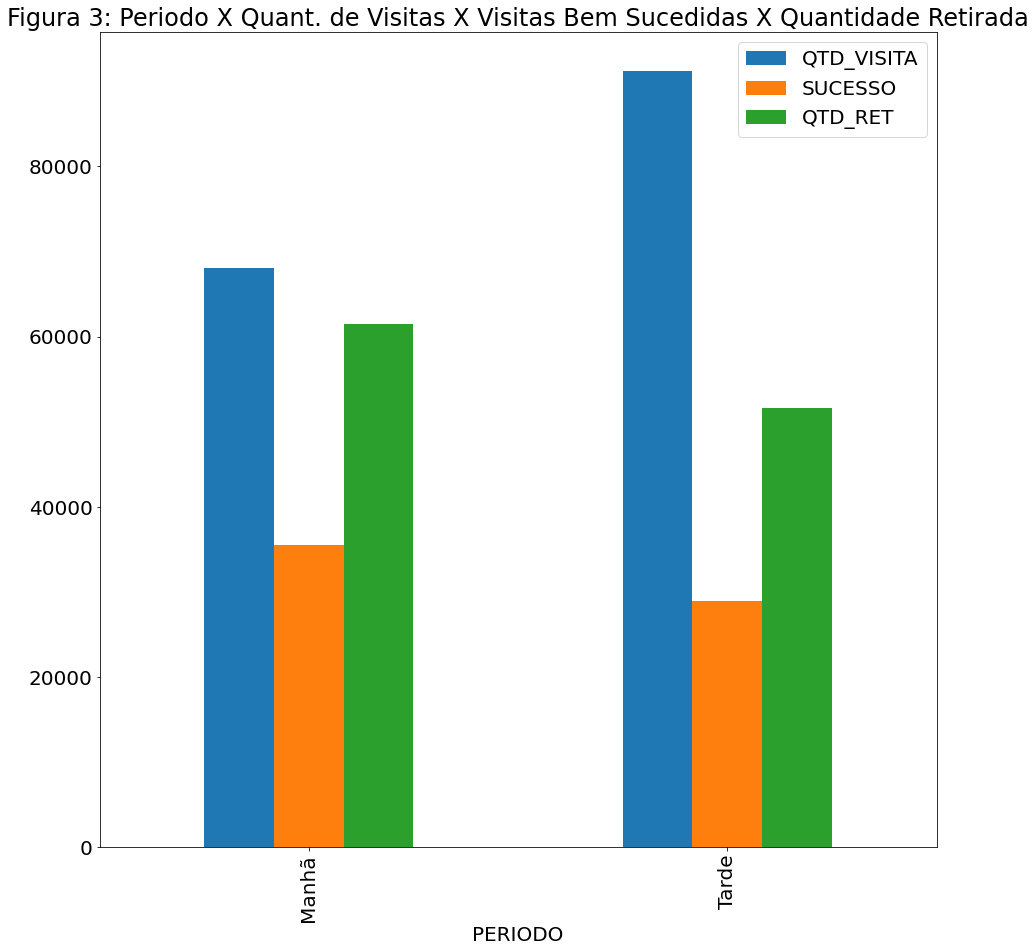

In [22]:
# gerar gráfico de Periodo X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada

df.groupby(['PERIODO']).agg({'QTD_VISITA': np.sum, 'SUCESSO': np.sum, 'QTD_RET': np.sum})\
                        .sort_values(by='QTD_RET', ascending=False).plot(kind='bar',legend=True,figsize=(15, 15) \
                         ,title='Figura 3: Periodo X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada')


<AxesSubplot:title={'center':'Figura 4: Técnico X área X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada'}, xlabel='TECNICO,AREA'>

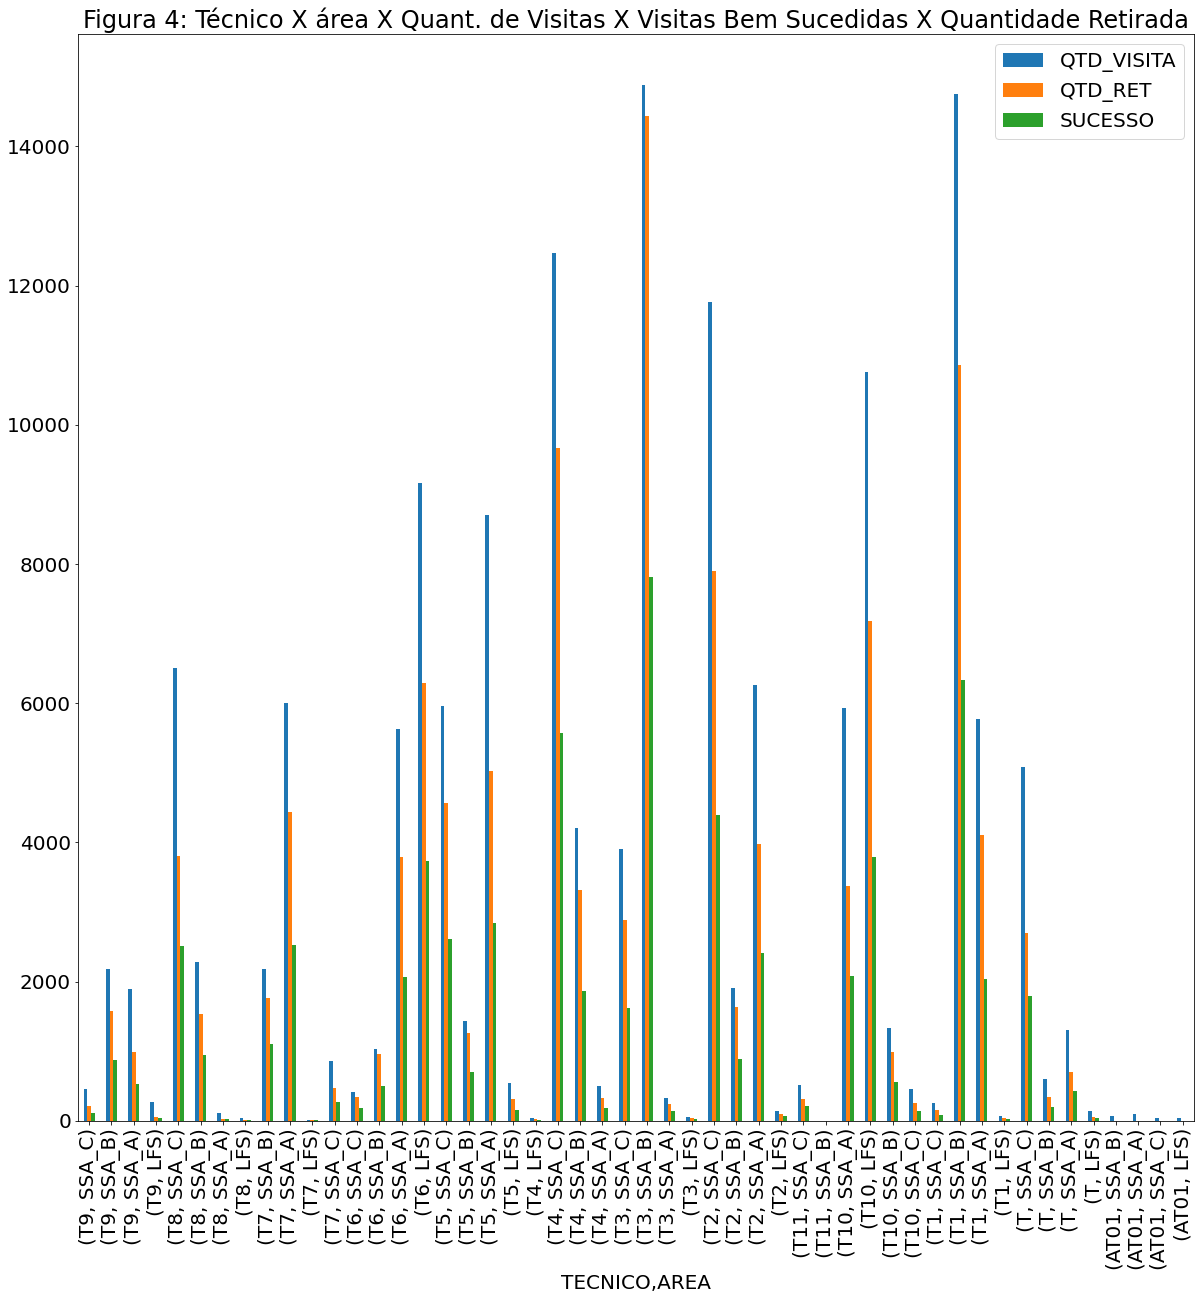

In [23]:
# gerar gráfico de Técnico X área X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada

df.groupby(['TECNICO','AREA']).agg({'QTD_VISITA': np.sum, 'QTD_RET': np.sum, 'SUCESSO': np.sum}) \
                            .sort_values(by='TECNICO', ascending=False).plot(kind='bar',legend=True,figsize=(20, 20) \
                            ,title='Figura 4: Técnico X área X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada')

<AxesSubplot:title={'center':'Figura 5: Ano X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada'}, xlabel='ANO'>

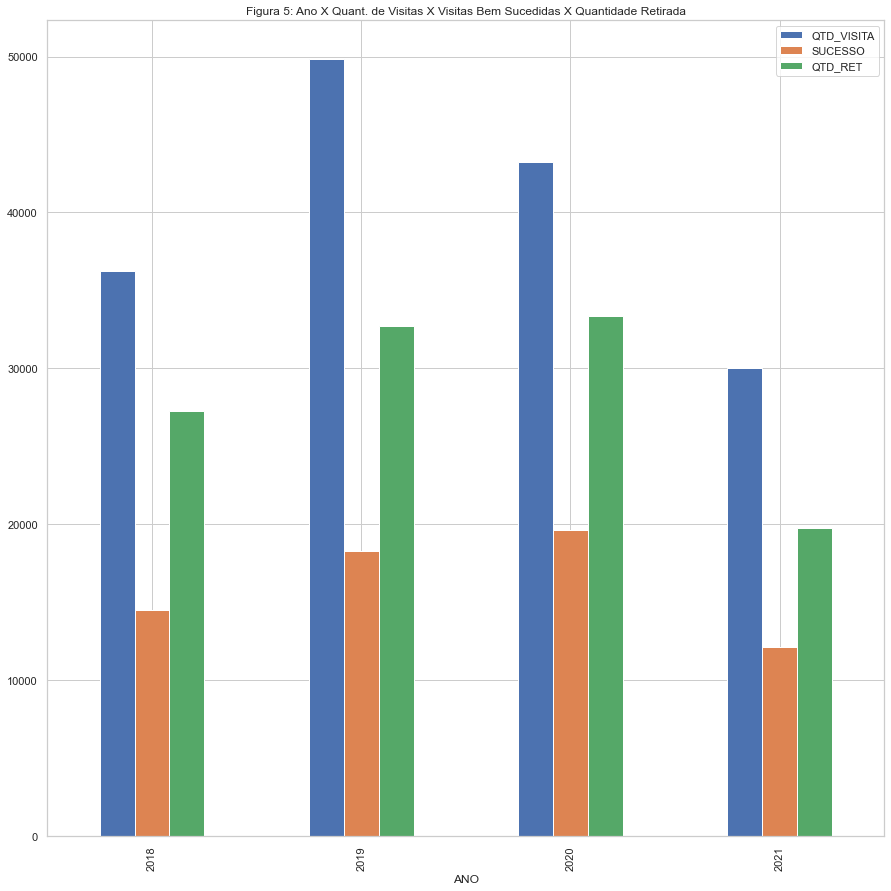

In [7]:
# gerar gráfico de Ano X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada


df.groupby(['ANO']).agg({'QTD_VISITA': np.sum, 'SUCESSO': np.sum, 'QTD_RET': np.sum}) \
                    .sort_values(by='ANO', ascending=True).plot(kind='bar',legend=True,figsize=(15, 15) \
                    ,title='Figura 5: Ano X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada')                                                                     
                                                                     

<AxesSubplot:title={'center':'Figura 6: Mês X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada'}, xlabel='MES'>

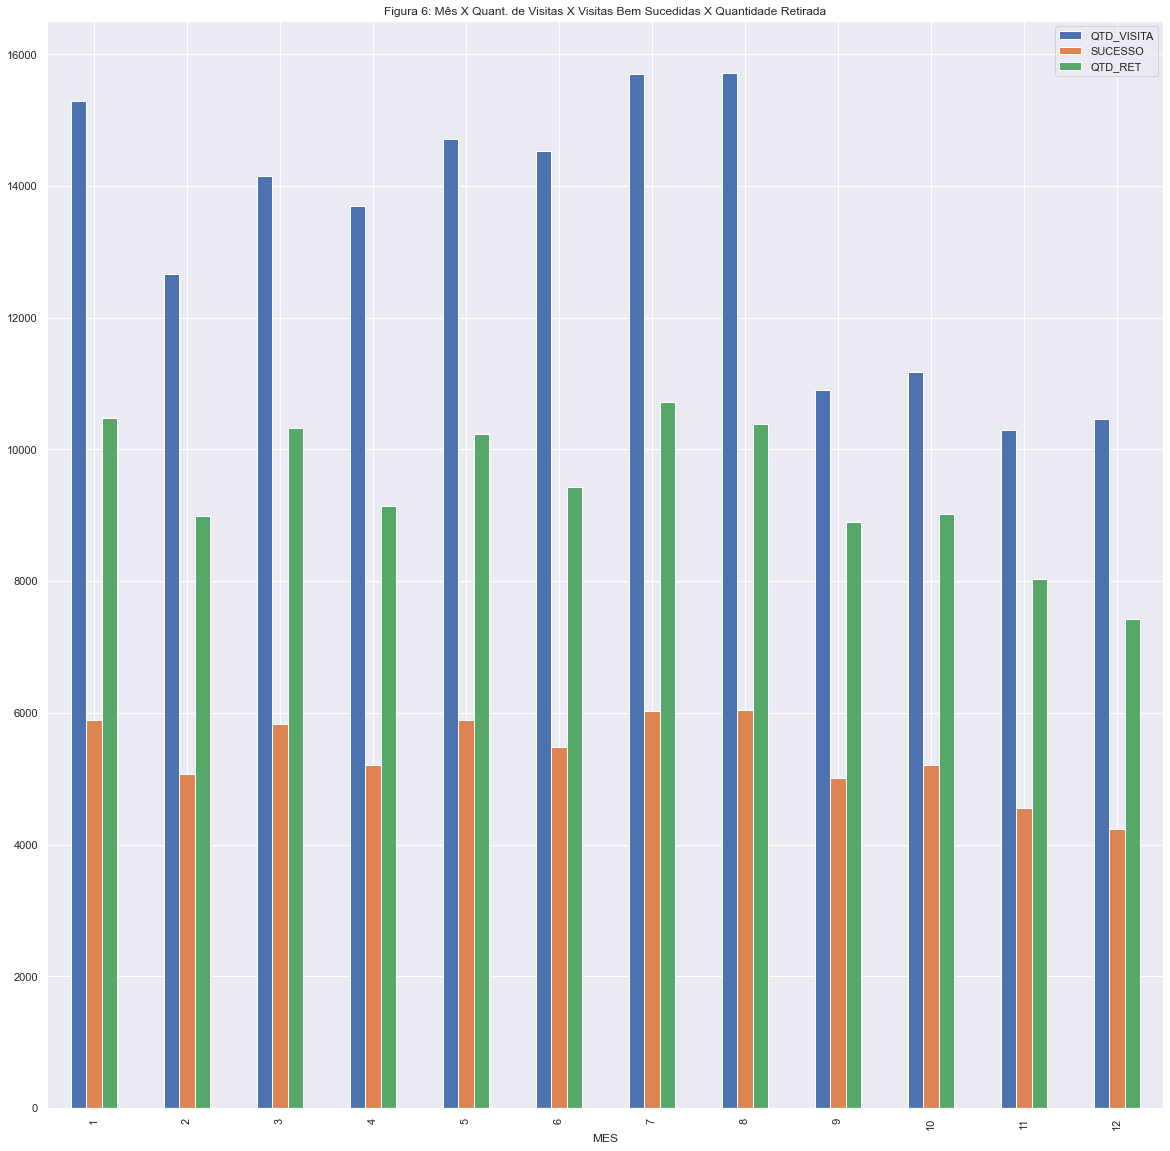

In [31]:
# gerar gráfico de Mês X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada independente do ano

df.groupby(['MES']).agg({'QTD_VISITA': np.sum, 'SUCESSO': np.sum, 'QTD_RET': np.sum}).sort_values(by='MES', ascending=True) \
                    .plot(kind='bar',legend=True,figsize=(20, 20) \
                    ,title='Figura 6: Mês X Quant. de Visitas X Visitas Bem Sucedidas X Quantidade Retirada')                

In [98]:
#PORCENTAGEM  de tipo os bem sucedida por Bairro

EMPRESA_AREA = df.groupby(['EMPRESA','AREA']).agg({'QTD_VISITA': np.sum})
PERCT_EMPRESA_AREA = EMPRESA_AREA.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
PERCT_EMPRESA_AREA.head()


QTD_VISITA
EMPRESA         AREA              
Alcazar Coletas LFR      13.344048
                SDR-01   26.681818
                SDR-02   29.419188
                SDR-03   30.554945

In [99]:
#PORCENTAGEM  de tipo os bem sucedida por Bairro

EMPRESA_AREA_RET = df.groupby(['EMPRESA','AREA']).agg({'QTD_RET': np.sum})
EMPRESA_AREA_RET.head()
#PORCENTAGEM  de tipo os bem sucedida por Bairro

QTD_RET
EMPRESA         AREA           
Alcazar Coletas LFR       14133
                SDR-01    27015
                SDR-02    38663
                SDR-03    33258

In [100]:
#Total de equipamento consolidado em tabela por tipo de OS

print("Total de Equipamentos Retirados por Tipo de OS")
p = df.groupby(['EMPRESA','MOTIVO_BAIXA']).agg({'QTD_VISITA': np.sum})

print(p)


Total de Equipamentos Retirados por Tipo de OS
                                                              QTD_VISITA
EMPRESA         MOTIVO_BAIXA                                            
Alcazar Coletas Agendamento Não Cumprido                            7476
                Cliente Ausente                                    30998
                Cliente Recusa-se Devolver o Decoder / Modem        5026
                Cliente não solicitou serviço                       1561
                Correção de Cadastro / Vistoria                     2438
                Desco. Efetuada Com Retirada De Equipamento        21312
                Desco. Efetuada Sem Retirada de Equipamento         3978
                Endereco Não Localizado                             7654
                Equipamento Retirado                               43494
                Não Reside No Endereço                             18610
                Outras                                              1948
    

In [101]:
#PORCENTAGEM  de tipo os bem sucedida por motivo da Baixa

state_office = df.groupby(['EMPRESA','MOTIVO_BAIXA']).agg({'QTD_VISITA': 'sum'})
state_pcts = state_office.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
state_pcts


QTD_VISITA
EMPRESA         MOTIVO_BAIXA                                            
Alcazar Coletas Agendamento Não Cumprido                        4.693710
                Cliente Ausente                                19.461693
                Cliente Recusa-se Devolver o Decoder / Modem    3.155509
                Cliente não solicitou serviço                   0.980054
                Correção de Cadastro / Vistoria                 1.530667
                Desco. Efetuada Com Retirada De Equipamento    13.380463
                Desco. Efetuada Sem Retirada de Equipamento     2.497536
                Endereco Não Localizado                         4.805465
                Equipamento Retirado                           27.307144
                Não Reside No Endereço                         11.684047
                Outras                                          1.223027
                Reagendamento Solicitado Pelo Cliente           8.653478
                Tipo de OS Incorreta                            0.627209

<AxesSubplot:title={'center':'Quantidade de Visitas X Quantidade Retirada em Relação ao mês'}, ylabel='AREA,MOTIVO_BAIXA'>

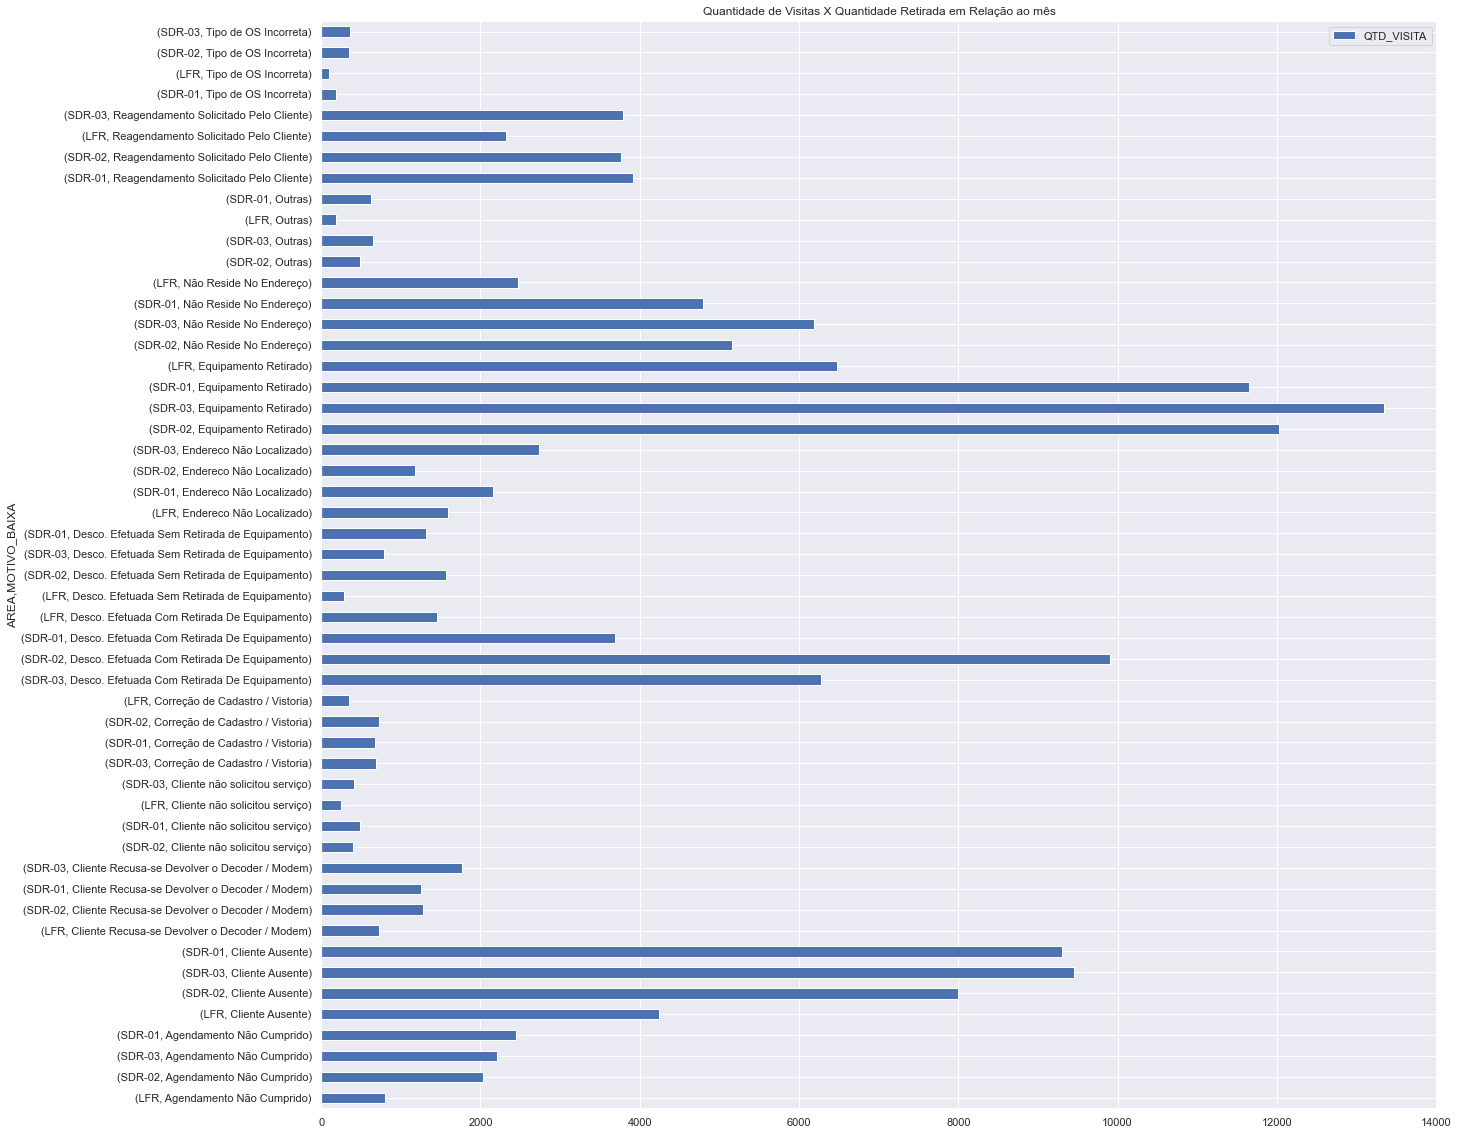

In [32]:
#Gráfico Horizontal por area e motivo da Baixa

df.groupby(['AREA','MOTIVO_BAIXA']).agg({'QTD_VISITA': np.sum}).sort_values(by='MOTIVO_BAIXA', ascending=True) \
                    .plot(kind='barh',legend=True,figsize=(20, 20) \
                    ,title='Quantidade de Visitas X Quantidade Retirada em Relação ao mês')      

In [103]:
#Saber porcentagem de Os por Produtiva ou Improdutiva

(df.CLASSIFICACAO_BAIXA.value_counts() / df.shape[0]) * 100

Baixa Improdutiva    56.814857
Baixa produtiva      43.185143
Name: CLASSIFICACAO_BAIXA, dtype: float64

C:\Users\Gilson Ramos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


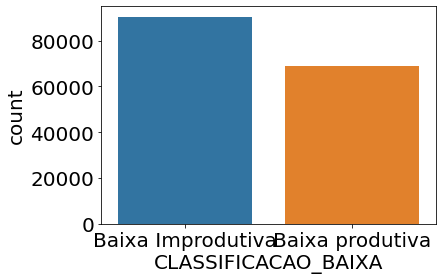

,values,n,perc
Baixa Improdutiva,Baixa Improdutiva,90493,56.815
Baixa produtiva,Baixa produtiva,68784,43.185


In [104]:
#Gráfico Usando a função criada, com tabela de dados abaixo por tipo de baixa

freq(df.CLASSIFICACAO_BAIXA, plot=True)

C:\Users\Gilson Ramos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


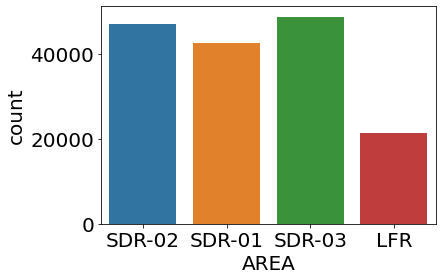

,values,n,perc
SDR-03,SDR-02,48667,30.555
SDR-02,SDR-01,46858,29.419
SDR-01,SDR-03,42498,26.682
LFR,LFR,21254,13.344


In [106]:
#Gráfico Usando a função criada, com tabela de dados abaixo por Area;

freq(df.AREA, plot=True)

C:\Users\Gilson Ramos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


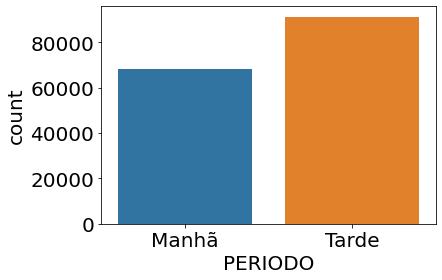

,values,n,perc
Tarde,Manhã,91251,57.291
Manhã,Tarde,68026,42.709


In [107]:
#Gráfico Usando a função criada, com tabela de dados abaixo por PEriodo;
freq(df.PERIODO, plot=True)

In [108]:
df.QTD_RET.describe()


count    159277.000000
mean          0.709889
std           1.106971
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         114.000000
Name: QTD_RET, dtype: float64

In [109]:
#calculo da Regressão Logística, levando em consideração as variaveis abaixo.
#SUCESSO
#PERIODO_NUM
#ANO
#AREA_NUM
#TIPO_OS_NUM


df['TIPO_OS'] = df['TIPO_OS'].astype('category')

modelo = smf.glm(formula='SUCESSO ~ TIPO_OS + AREA + PERIODO', data=df,
                family = sm.families.Binomial()).fit()
print(modelo.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                SUCESSO   No. Observations:               159277
Model:                            GLM   Df Residuals:                   159269
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -99358.
Date:                Tue, 21 Sep 2021   Deviance:                   1.9872e+05
Time:                        18:37:39   Pearson chi2:                 1.59e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [110]:
# Agora vamos fazer com sklearn para aproveitar as métricas
model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = df[['SUCESSO', 'TIPO_OS', 'AREA', 'ANO']].dropna()
y = baseline_df.SUCESSO
X = pd.get_dummies(baseline_df[['TIPO_OS', 'AREA', 'ANO']], drop_first=True)
print(X)

         ANO  TIPO_OS_Desconexão por Inadimplência  \
0       2018                                     0   
1       2018                                     0   
2       2018                                     0   
3       2018                                     0   
4       2018                                     0   
...      ...                                   ...   
159272  2021                                     0   
159273  2021                                     0   
159274  2021                                     0   
159275  2021                                     0   
159276  2021                                     0   

        TIPO_OS_Diminuição de Pontos do Contrato  \
0                                              0   
1                                              0   
2                                              0   
3                                              1   
4                                              0   
...                                    

In [111]:
model.fit(X, y)

C:\Users\Gilson Ramos\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gilson Ramos\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gilson Ramos\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gilson Ramos\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gilson Ramos\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm

LogisticRegression(penalty='none', solver='newton-cg')

In [112]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty='none', solver='newton-cg')

In [113]:
print(model.coef_) 

[[ 0.07604348 -1.37636608  0.0144943  -0.65064851 -0.04974158  0.29612493
   0.11839691]]


In [293]:
yhat = model.predict_proba(X)

In [294]:
yhat = yhat[:, 1]

In [295]:
confusion_matrix(y, model.predict(X))

array([[71489, 23339],
       [34421, 30028]], dtype=int64)

In [296]:
pd.crosstab(y, model.predict(X))

col_0,0,1
SUCESSO,,
0,71489,23339
1,34421,30028


In [297]:
acuracia = accuracy_score(y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.6374 de acurácia.


In [298]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71     94828
           1       0.56      0.47      0.51     64449

    accuracy                           0.64    159277
   macro avg       0.62      0.61      0.61    159277
weighted avg       0.63      0.64      0.63    159277



In [299]:
#Função para criação do grafico.

def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

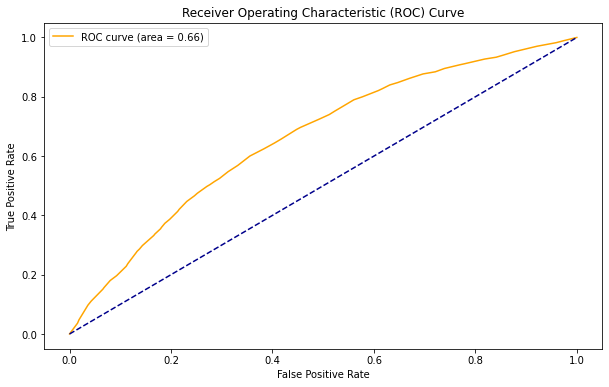

In [300]:
#Gráfico da regressão com sklearn

plot_roc_curve(y, yhat)

In [84]:
#Filtro de DataFrame por OS sem sucesso na retirada, para melhor análise dos dados.

df_insucesso = df.query('CLASSIFICACAO_BAIXA=="Baixa Improdutiva"')
df_insucesso.head()

,EMPRESA,DATA_REFERENCIA,CODIGO_BAIXA,DESC_BAIXA,COD_CONTRATO,TIPO_OS_NUM,TIPO_OS,TIPO_VISITA,AREA_NUM,AREA,...,DIA_SEMANA,TECNICO_NUM,TECNICO,QTD_VISITA,SUCESSO,VISITA_SUCESSO,QTD_RET,MOTIVO_BAIXA,CLASSIFICACAO_BAIXA,INSUCESSO
0,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,167102447,2,Diminuição de Pontos do Contrato,Primeira Visita,2,SSA_B,...,quarta-feira,NaN,T3,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
1,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,95992078,2,Diminuição de Pontos do Contrato,Primeira Visita,2,SSA_B,...,quarta-feira,NaN,T4,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
2,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,165341967,2,Diminuição de Pontos do Contrato,Primeira Visita,1,SSA_A,...,quarta-feira,NaN,T1,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
3,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,95805251,0,Desconexão a Pedido do Cliente,Primeira Visita,3,SSA_C,...,quarta-feira,NaN,T10,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1
4,Alcazar Coletas,2018-01-03,280,280 - alteração no cadastro,94987623,0,Desconexão a Pedido do Cliente,Primeira Visita,1,SSA_A,...,quarta-feira,NaN,T5,1,0,Sem Sucesso,0,Solicitação de Vistoria,Baixa Improdutiva,1


In [85]:
# Quantidade de tipo os sem sucesso sucedida por area

state_office = df_insucesso.groupby(['EMPRESA','AREA']).agg({'QTD_VISITA': 'sum'})
state_office


QTD_VISITA
EMPRESA         AREA             
Alcazar Coletas LFS         13036
                SSA_A       25845
                SSA_B       23362
                SSA_C       28250

In [99]:
#PORCENTAGEM  de tipo os mal sucedida por Area

state_office = df_insucesso.groupby(['EMPRESA','AREA']).agg({'QTD_VISITA': 'sum'})
state_pcts = state_office.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
state_pcts

,QTD_VISITA
MOTIVO_BAIXA,
Cliente Ausente,100.0
Cliente Solicitou Novo Agendamento,100.0
Cliente naõ pediu o Serviço,100.0
Cliente não quer devolver o Equipamento,100.0
Não Localizou o endereço,100.0
Não Reside No Local,100.0
Não compriu agenda,100.0
OS Incorreta,100.0
Outras,100.0


In [87]:
#PORCENTAGEM  de tipo os bem sucedida por Motivo da Baixa

state_office = df_insucesso.groupby(['EMPRESA','MOTIVO_BAIXA']).agg({'QTD_VISITA': 'sum'})
state_pcts = state_office.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
state_pcts.sort_values(by='QTD_VISITA', ascending=False)

QTD_VISITA
EMPRESA         MOTIVO_BAIXA                                       
Alcazar Coletas Cliente Ausente                           34.254583
                Não Reside No Local                       20.565127
                Cliente Solicitou Novo Agendamento        15.231012
                Não Localizou o endereço                   8.458113
                Não compriu agenda                         8.261412
                Cliente não quer devolver o Equipamento    5.554021
                Solicitação de Vistoria                    2.694131
                Outras                                     2.152653
                Cliente naõ pediu o Serviço                1.724995
                OS Incorreta                               1.103953

In [88]:
# Somatorio por motivo da baixa, das os sem sucesso

df_insucesso.groupby(['MOTIVO_BAIXA'],as_index = False).QTD_VISITA.sum().sort_values(by='QTD_VISITA', ascending=False).sort_values(by='QTD_VISITA', ascending=False)

,MOTIVO_BAIXA,QTD_VISITA
0,Cliente Ausente,30998
5,Não Reside No Local,18610
1,Cliente Solicitou Novo Agendamento,13783
4,Não Localizou o endereço,7654
6,Não compriu agenda,7476
3,Cliente não quer devolver o Equipamento,5026
9,Solicitação de Vistoria,2438
8,Outras,1948
2,Cliente naõ pediu o Serviço,1561
7,OS Incorreta,999


In [89]:
# Somatorio por motivo da baixa e area das os sem sucesso

df_insucesso.groupby(['AREA','MOTIVO_BAIXA'],as_index = False).QTD_VISITA.sum().sort_values(by='QTD_VISITA', ascending=False).head()

,AREA,MOTIVO_BAIXA,QTD_VISITA
30,SSA_C,Cliente Ausente,9455
10,SSA_A,Cliente Ausente,9308
20,SSA_B,Cliente Ausente,7991
35,SSA_C,Não Reside No Local,6192
25,SSA_B,Não Reside No Local,5155


C:\Users\Gilson Ramos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


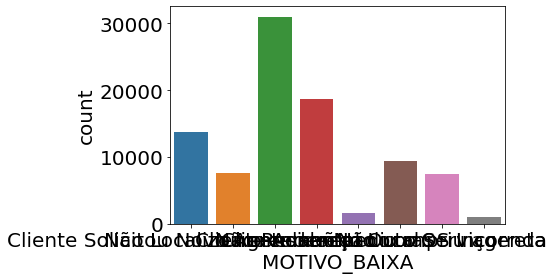

,values,n,perc
Cliente Ausente,Cliente Solicitou Novo Agendamento,30998,34.255
Não Reside No Local,Não Localizou o endereço,18610,20.565
Cliente Solicitou Novo Agendamento,Cliente Ausente,13783,15.231
Outras,Não Reside No Local,9412,10.401
Não Localizou o endereço,Cliente naõ pediu o Serviço,7654,8.458
Não compriu agenda,Outras,7476,8.261
Cliente naõ pediu o Serviço,Não compriu agenda,1561,1.725
OS Incorreta,OS Incorreta,999,1.104


In [33]:
# Somatorio e gráfico por motivo da baixa, das os sem sucesso

freq(df_insucesso.MOTIVO_BAIXA, plot=True)

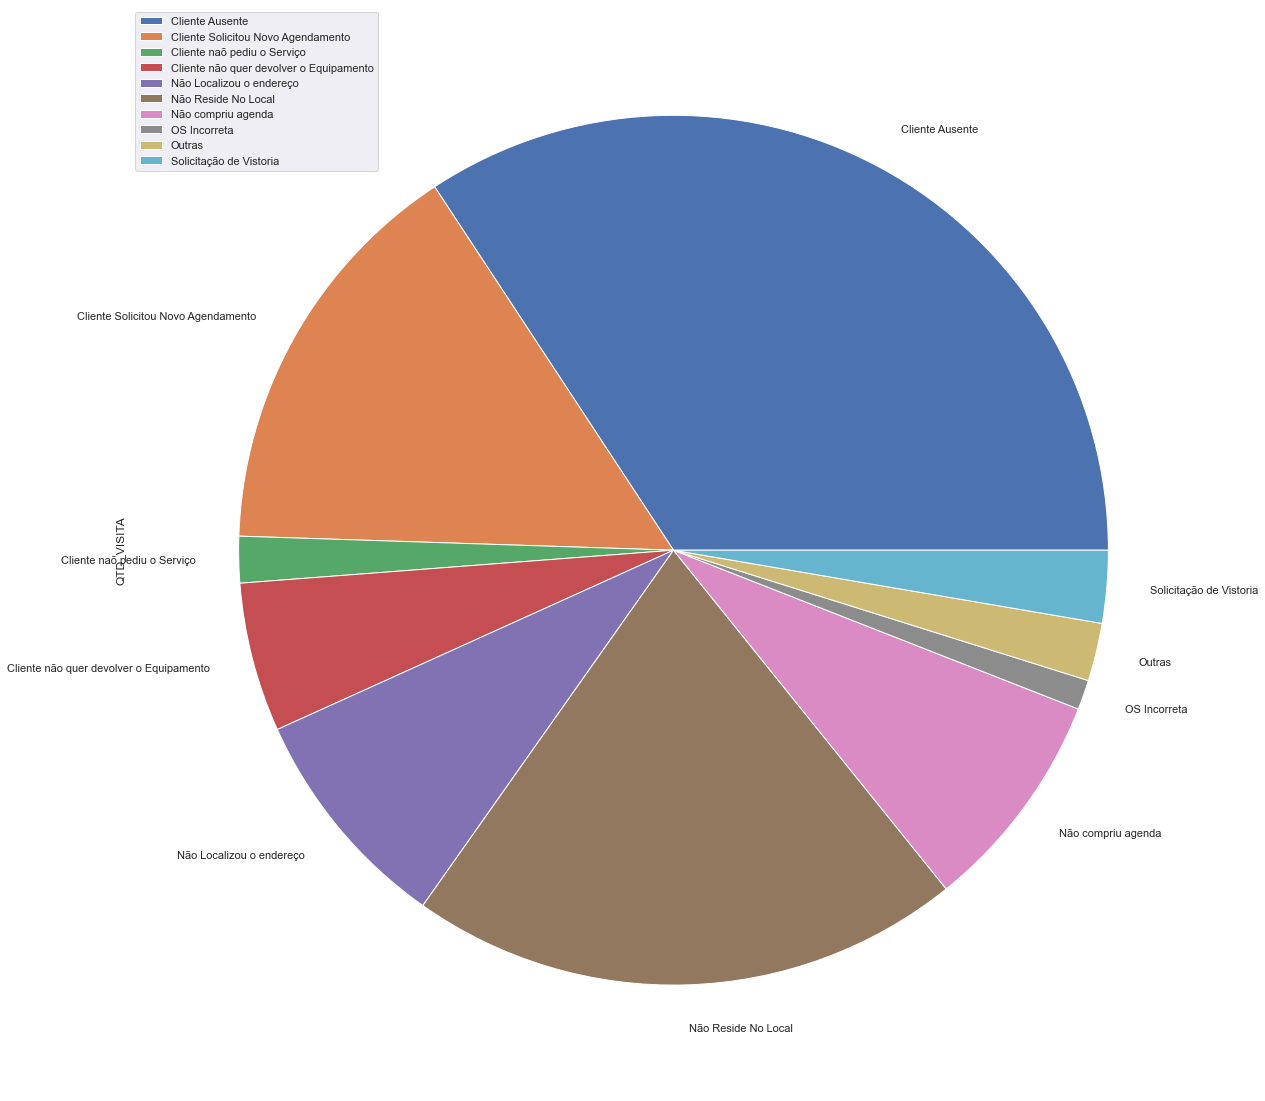

In [98]:
# Somatorio por motivo da baixa,consolidado por quantidade de visita, em gráfico pizza

df_insucesso.groupby(['MOTIVO_BAIXA']).agg({'QTD_VISITA': np.sum}).plot.pie(y='QTD_VISITA', figsize=(20, 20)).legend(loc='upper left')

C:\Users\Gilson Ramos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


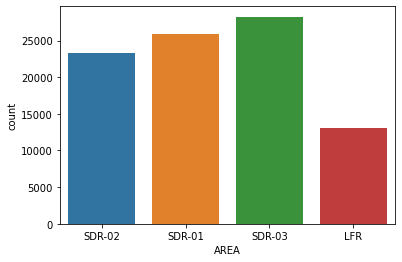

,values,n,perc
SDR-03,SDR-02,28250,31.218
SDR-01,SDR-01,25845,28.560
SDR-02,SDR-03,23362,25.816
LFR,LFR,13036,14.406


In [44]:
# Quantidade de tipo os sem sucesso sucedida por area

freq(df_insucesso.AREA, plot=True)

C:\Users\Gilson Ramos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


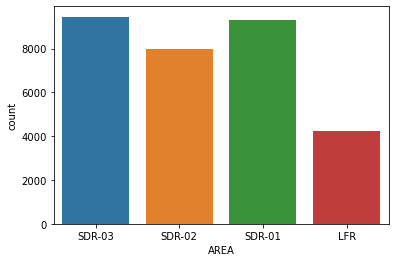

,values,n,perc
SDR-03,SDR-03,9455,30.502
SDR-01,SDR-02,9308,30.028
SDR-02,SDR-01,7991,25.779
LFR,LFR,4244,13.691


In [45]:
# análise de SO para o maior motivo de improdutividade Cliente Ausente/ por area

freq(df_clienteAusente.AREA, plot=True)

C:\Users\Gilson Ramos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


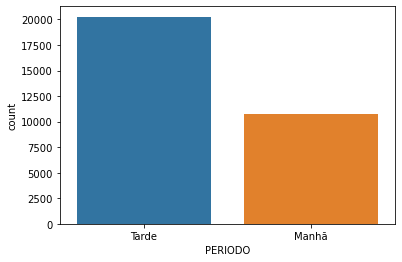

,values,n,perc
Tarde,Tarde,20270,65.391
Manhã,Manhã,10728,34.609


In [46]:
# análise de SO para o maior motivo de improdutividade Cliente Ausente/ por Periodo

freq(df_clienteAusente.PERIODO, plot=True)

In [1]:
# análise de SO para o maior motivo de improdutividade Cliente Ausente/ por Tipo OS

freq(df_clienteAusente.TIPO_OS, plot=True)

NameError: name 'freq' is not defined

In [95]:
#tabela Consolidada por ANálise, por Tipo de Baixa e PErcentual

contagem = df_insucesso.MOTIVO_BAIXA.value_counts()
percentual = round((contagem / df_insucesso.MOTIVO_BAIXA.shape[0]) * 100, 3)
res = pd.DataFrame({ 'Quantidade': contagem, 'Percentual': percentual})
print(res)


                                         Quantidade  Percentual
Cliente Ausente                               30998      34.255
Não Reside No Local                           18610      20.565
Cliente Solicitou Novo Agendamento            13783      15.231
Não Localizou o endereço                       7654       8.458
Não compriu agenda                             7476       8.261
Cliente não quer devolver o Equipamento        5026       5.554
Solicitação de Vistoria                        2438       2.694
Outras                                         1948       2.153
Cliente naõ pediu o Serviço                    1561       1.725
OS Incorreta                                    999       1.104


<AxesSubplot:title={'center':'Figura 8: Insucesso por Motivo'}, ylabel='MOTIVO_BAIXA'>

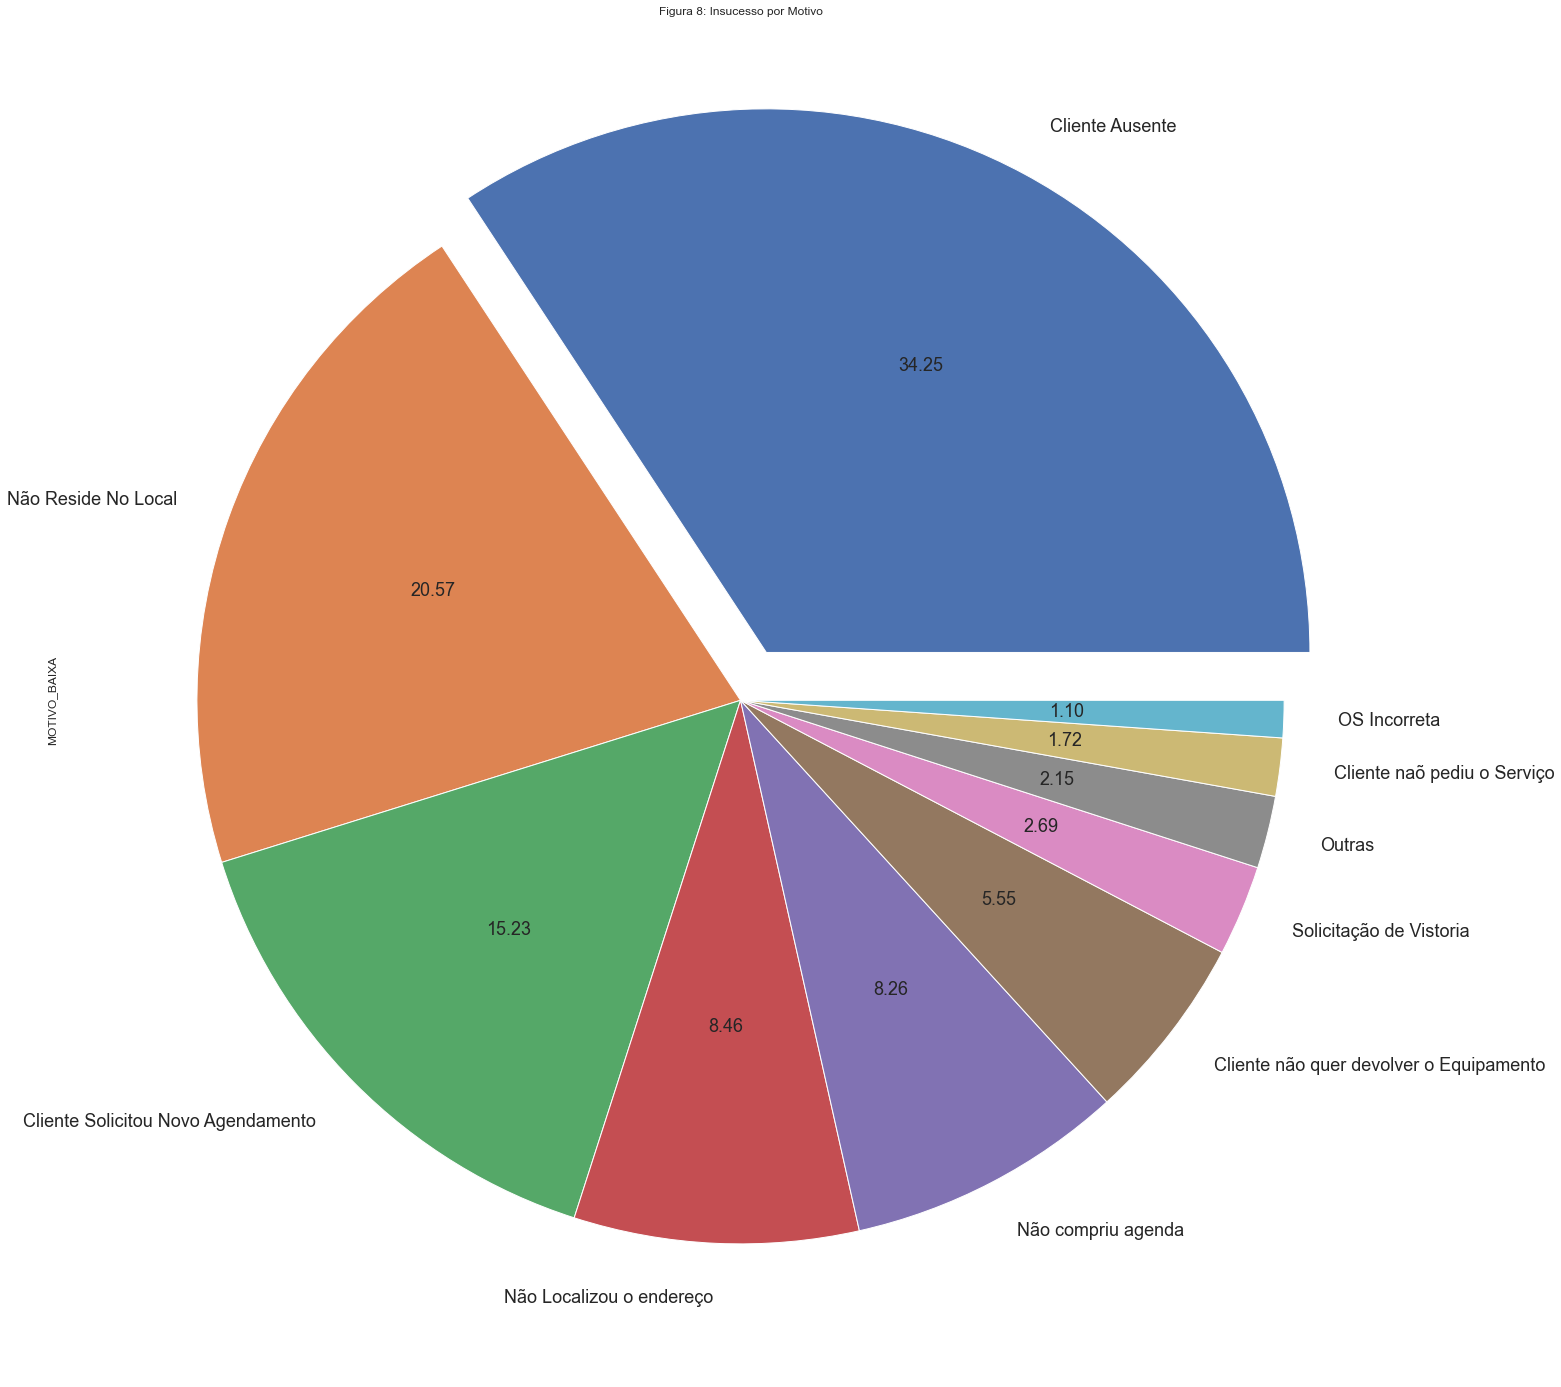

In [168]:
# análise em forma de grafico pizza, para mostrar os maiores motivos de insucesso por OS

linha = df_insucesso['MOTIVO_BAIXA'].value_counts()


x = (0.1,0,0,0,0,0,0,0,0,0)

plt.figure (figsize=(25,25))
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25


linha.plot.pie(autopct = '%1.2f',textprops={'fontsize': 18},explode = x,shadow = False, title = 'Figura 8: Insucesso por Motivo')



In [97]:
# análise  para mostrar os maiores motivos de insucesso por MOtivo da Baixa
linha = df_insucesso['MOTIVO_BAIXA'].value_counts()
linha.head(11)

Cliente Ausente                            30998
Não Reside No Local                        18610
Cliente Solicitou Novo Agendamento         13783
Não Localizou o endereço                    7654
Não compriu agenda                          7476
Cliente não quer devolver o Equipamento     5026
Solicitação de Vistoria                     2438
Outras                                      1948
Cliente naõ pediu o Serviço                 1561
OS Incorreta                                 999
Name: MOTIVO_BAIXA, dtype: int64

In [152]:
# análise para mostrar qtd retirada por OS de Sucesso.usando a função PIVOT

pd.pivot_table(df,index=["TIPO_OS"],values=["QTD_RET", "SUCESSO"])

,QTD_RET,SUCESSO
TIPO_OS,,
Desconexão a Pedido do Cliente,1.023573,0.544749
Desconexão por Inadimplência,0.430877,0.227892
Diminuição de Pontos do Contrato,0.695425,0.539470
Retirada de Equipamento,0.660010,0.384129


In [158]:
pd.pivot_table(df,index=["TIPO_OS"],values=["QTD_VISITA","QTD_RET", "SUCESSO"],aggfunc=np.sum)

,QTD_RET,QTD_VISITA,SUCESSO
TIPO_OS,,,
Desconexão a Pedido do Cliente,49979,48828,26599
Desconexão por Inadimplência,19514,45289,10321
Diminuição de Pontos do Contrato,11188,16088,8679
Retirada de Equipamento,32388,49072,18850


In [196]:
pd.pivot_table(df,index=["TIPO_OS"],values=["QTD_VISITA","QTD_RET", "SUCESSO","INSUCESSO"],aggfunc=[np.sum],fill_value=0,margins=True)

sum                           
                                 INSUCESSO QTD_RET QTD_VISITA SUCESSO
TIPO_OS                                                              
Desconexão a Pedido do Cliente       22229   49979      48828   26599
Desconexão por Inadimplência         34968   19514      45289   10321
Diminuição de Pontos do Contrato      7409   11188      16088    8679
Retirada de Equipamento              30222   32388      49072   18850
All                                  94828  113069     159277   64449

In [182]:
# análise para mostrar qtd retirada por OS de Quantidade Retirada, INsucesso e Sucesso.usando a função PIVOT
pd.pivot_table(df,index=["TIPO_OS"],values=["QTD_RET", "SUCESSO","INSUCESSO"],aggfunc=[np.mean],fill_value=0,margins=True)

mean                    
                                 INSUCESSO   QTD_RET   SUCESSO
TIPO_OS                                                       
Desconexão a Pedido do Cliente    0.455251  1.023573  0.544749
Desconexão por Inadimplência      0.772108  0.430877  0.227892
Diminuição de Pontos do Contrato  0.460530  0.695425  0.539470
Retirada de Equipamento           0.615871  0.660010  0.384129
All                               0.595365  0.709889  0.404635

In [203]:
t = pd.pivot_table(df,index=["TIPO_OS"],values=["QTD_VISITA","QTD_RET", "SUCESSO"],aggfunc=[np.sum],fill_value=0,margins=True)
t.head()

sum                   
                                 QTD_RET QTD_VISITA SUCESSO
TIPO_OS                                                    
Desconexão a Pedido do Cliente     49979      48828   26599
Desconexão por Inadimplência       19514      45289   10321
Diminuição de Pontos do Contrato   11188      16088    8679
Retirada de Equipamento            32388      49072   18850
All                               113069     159277   64449

In [212]:
# análise para mostrar qtd retirada por OS de Sucesso, qtd retirada, insucesso e Visitas usando a função PIVOT

t = pd.pivot_table(df,index=["TIPO_OS"],values=["QTD_VISITA","QTD_RET", "SUCESSO","INSUCESSO"],aggfunc=[np.sum,np.mean,np.std, np.max],fill_value=0,margins=True)
t.head()



sum                           
                                 INSUCESSO QTD_RET QTD_VISITA SUCESSO
TIPO_OS                                                              
Desconexão a Pedido do Cliente       22229   49979      48828   26599
Desconexão por Inadimplência         34968   19514      45289   10321
Diminuição de Pontos do Contrato      7409   11188      16088    8679
Retirada de Equipamento              30222   32388      49072   18850
All                                  94828  113069     159277   64449

In [211]:
#resumo dos dados utilizando describe
t.describe()

sum                                            
          INSUCESSO        QTD_RET     QTD_VISITA       SUCESSO
count      5.000000       5.000000       5.000000      5.000000
mean   37931.200000   45227.600000   63710.800000  25779.600000
std    33479.926623   40650.246854   55172.421958  22778.345546
min     7409.000000   11188.000000   16088.000000   8679.000000
25%    22229.000000   19514.000000   45289.000000  10321.000000
50%    30222.000000   32388.000000   48828.000000  18850.000000
75%    34968.000000   49979.000000   49072.000000  26599.000000
max    94828.000000  113069.000000  159277.000000  64449.000000

In [216]:
# análise para mostrar qtd retirada por tipo de OS de Sucesso. calculando soma, média, desvio padrão e maior quantidade retirada 

pd.pivot_table(df,index=["TIPO_OS"],values=["QTD_RET"],aggfunc=[np.sum,np.mean,np.std, np.max],fill_value=0)


,sum,mean,std,amax
,QTD_RET,QTD_RET,QTD_RET,QTD_RET
TIPO_OS,,,,
Desconexão a Pedido do Cliente,49979,1.023573,1.323391,114
Desconexão por Inadimplência,19514,0.430877,0.928102,8
Diminuição de Pontos do Contrato,11188,0.695425,0.803253,11
Retirada de Equipamento,32388,0.660010,1.027585,11


In [217]:
# análise para mostrar quantidade de sucrsso por tipo de OS. calculando soma, média, desvio padrão e maior quantidade retirada 

pd.pivot_table(df,index=["TIPO_OS"],values=["SUCESSO"],aggfunc=[np.sum,np.mean,np.std],fill_value=0)

,sum,mean,std,amax
,SUCESSO,SUCESSO,SUCESSO,SUCESSO
TIPO_OS,,,,
Desconexão a Pedido do Cliente,26599,0.544749,0.497999,1
Desconexão por Inadimplência,10321,0.227892,0.419477,1
Diminuição de Pontos do Contrato,8679,0.539470,0.498455,1
Retirada de Equipamento,18850,0.384129,0.486394,1


In [218]:
# análise para mostrar qtd retirada por tipo de OS de Sucesso filtrando insucesso. calculando soma, média, desvio padrão e maior quantidade retirada 

pd.pivot_table(df,index=["TIPO_OS"],values=["INSUCESSO"],aggfunc=[np.sum,np.mean,np.std],fill_value=0)

,sum,mean,std,amax
,INSUCESSO,INSUCESSO,INSUCESSO,INSUCESSO
TIPO_OS,,,,
Desconexão a Pedido do Cliente,22229,0.455251,0.497999,1
Desconexão por Inadimplência,34968,0.772108,0.419477,1
Diminuição de Pontos do Contrato,7409,0.460530,0.498455,1
Retirada de Equipamento,30222,0.615871,0.486394,1


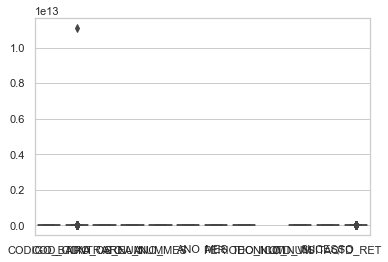

In [5]:
#Verificação de Outlier

sns.set(style="whitegrid", color_codes=True)

sns.boxplot(data=df);


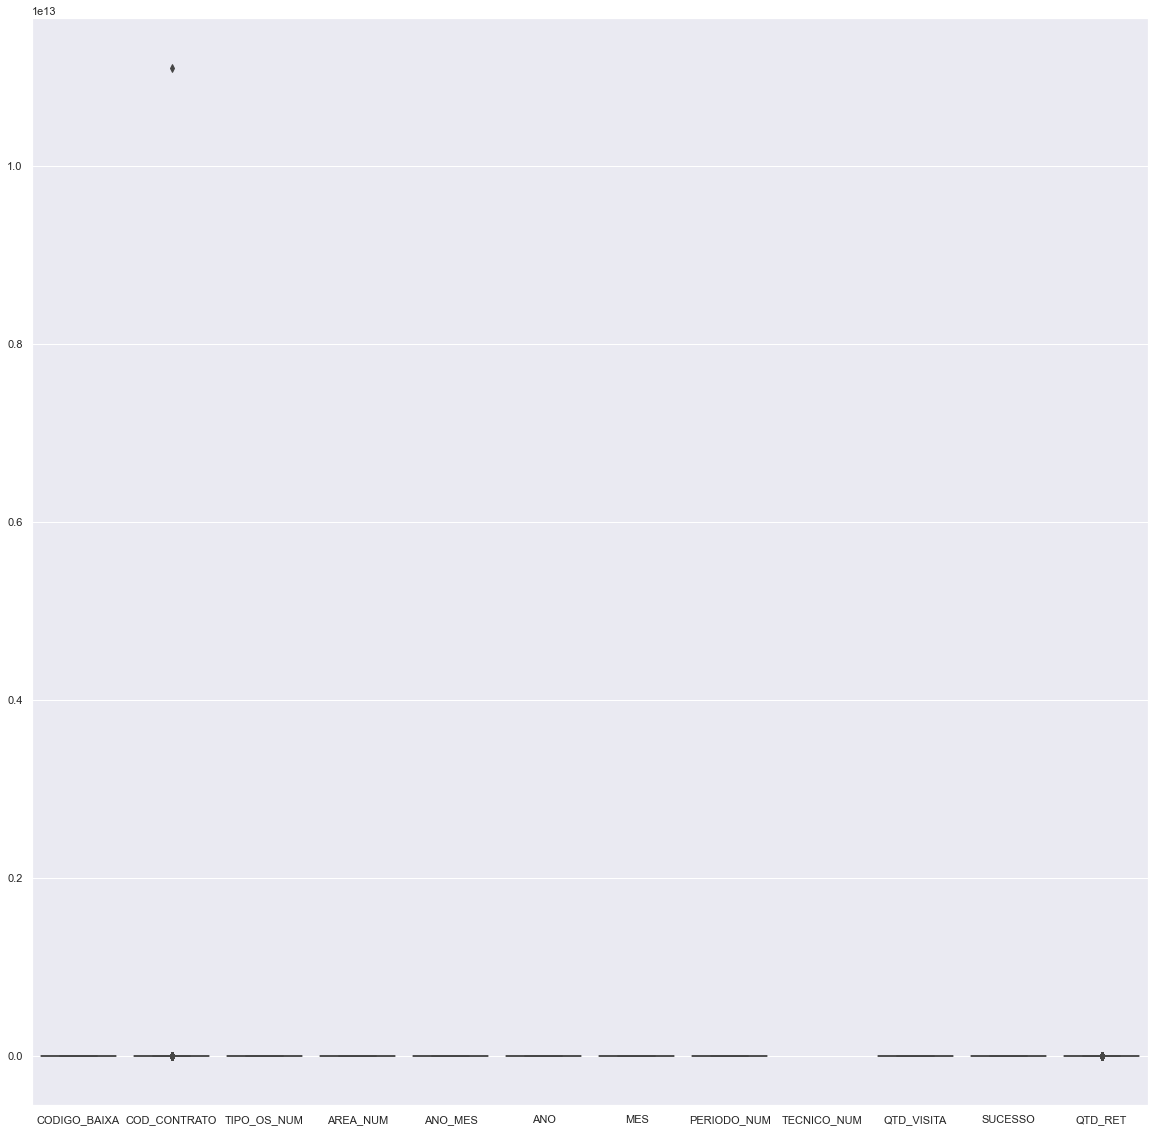

In [8]:
#Verificação de Outliers

sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(data=df);
